In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [2]:
data = pd.read_csv('alphabets_28x28.csv')

/var/folders/xp/xnlrv7g527s299zslry8mmlc0000gn/T/ipykernel_2180/27077707.py:1: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('alphabets_28x28.csv')


In [3]:
data

,label,row 1 col 1 pixel,row 1 col 2 pixel,row 1 col 3 pixel,row 1 col 4 pixel,row 1 col 5 pixel,row 1 col 6 pixel,row 1 col 7 pixel,row 1 col 8 pixel,row 1 col 9 pixel,...,row 28 col 19 pixel,row 28 col 20 pixel,row 28 col 21 pixel,row 28 col 22 pixel,row 28 col 23 pixel,row 28 col 24 pixel,row 28 col 25 pixel,row 28 col 26 pixel,row 28 col 27 pixel,row 28 col 28 pixel
0,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Columns: 785 entries, label to row 28 col 28 pixel
dtypes: float64(780), object(5)
memory usage: 2.2+ GB


In [5]:
def is_valid_row(row):
    try:
        return all(0 <= float(i) <= 255 for i in row[1:])
    except ValueError:
        return False
    
data_cleaned = data[data.apply(is_valid_row, axis = 1)]

In [6]:
data_cleaned

,label,row 1 col 1 pixel,row 1 col 2 pixel,row 1 col 3 pixel,row 1 col 4 pixel,row 1 col 5 pixel,row 1 col 6 pixel,row 1 col 7 pixel,row 1 col 8 pixel,row 1 col 9 pixel,...,row 28 col 19 pixel,row 28 col 20 pixel,row 28 col 21 pixel,row 28 col 22 pixel,row 28 col 23 pixel,row 28 col 24 pixel,row 28 col 25 pixel,row 28 col 26 pixel,row 28 col 27 pixel,row 28 col 28 pixel
0,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
features = data_cleaned.iloc[:, 1:].values 
labels = data_cleaned.iloc[:,0].values

In [8]:
labels

array(['A', 'A', 'A', ..., 'Z', 'Z', 'Z'], dtype=object)

In [9]:
features = features.reshape(features.shape[0], 28, 28, 1).astype('float32')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 420)

In [11]:
X_train.shape[0] + X_test.shape[0] == features.shape[0]

True

## Normalisation of data

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
import matplotlib.pyplot as plt

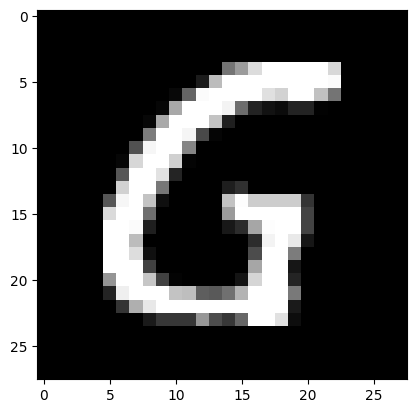

In [14]:
plt.imshow(X_train[2], cmap = 'gray')

In [15]:
y_train[2]

'G'

In [16]:
y_train

array(['U', 'E', 'G', ..., 'O', 'M', 'O'], dtype=object)

# OCR

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

In [19]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
num_classes = y_test_categorical.shape[1]

In [21]:
num_classes

26

## Building the CNN

In [22]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

def convolutional_model(input_shape=(28, 28, 1), num_classes=26):
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    # Flatten layer
    model.add(Flatten())
    
    # Dense layers
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [24]:
# Create the model
model = convolutional_model()

# Fit the model
history = model.fit(X_train, y_train_categorical, validation_data=(X_test, y_test_categorical), epochs=10, batch_size=200, verbose=2)

# Evaluate the model
scores = model.evaluate(X_test, y_test_categorical, verbose=0)
print("Accuracy: {:.2f}%".format(scores[1] * 100))
print("Error: {:.2f}%".format((1 - scores[1]) * 100))


Epoch 1/10
1486/1486 - 36s - loss: 0.2336 - accuracy: 0.9346 - val_loss: 0.0828 - val_accuracy: 0.9767 - 36s/epoch - 24ms/step
Epoch 2/10
1486/1486 - 35s - loss: 0.0698 - accuracy: 0.9806 - val_loss: 0.0595 - val_accuracy: 0.9838 - 35s/epoch - 24ms/step
Epoch 3/10
1486/1486 - 36s - loss: 0.0526 - accuracy: 0.9851 - val_loss: 0.0482 - val_accuracy: 0.9864 - 36s/epoch - 24ms/step
Epoch 4/10
1486/1486 - 37s - loss: 0.0427 - accuracy: 0.9877 - val_loss: 0.0541 - val_accuracy: 0.9842 - 37s/epoch - 25ms/step
Epoch 5/10
1486/1486 - 37s - loss: 0.0351 - accuracy: 0.9897 - val_loss: 0.0415 - val_accuracy: 0.9884 - 37s/epoch - 25ms/step
Epoch 6/10
1486/1486 - 37s - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.0364 - val_accuracy: 0.9899 - 37s/epoch - 25ms/step
Epoch 7/10
1486/1486 - 39s - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0344 - val_accuracy: 0.9903 - 39s/epoch - 27ms/step
Epoch 8/10
1486/1486 - 37s - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0321 - val_accuracy: 0.9912 - 37s/ep

## Accuracy = 99.05%

1/1 [==============================] - 0s 58ms/step
['A']


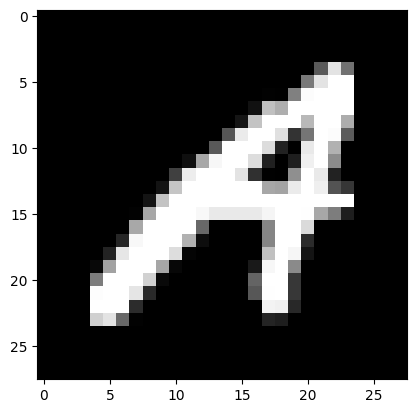

In [25]:
X_new = X_test[2]
X_new_reshaped = X_new.reshape(-1, 28, 28, 1)
# Use the trained model to make predictions
predictions = model.predict(X_new_reshaped)


predicted_classes = np.argmax(predictions, axis = -1)
predicted_classes_original = label_encoder.inverse_transform(predicted_classes)
# Print predicted classes
print(predicted_classes_original)
plt.imshow(X_test[2], cmap = 'gray')

# Sentiment Analysis 

## Using Naive Bayes

In [26]:
sentiments = pd.read_csv("sentiment_analysis_dataset.csv")

In [27]:
sentiments.isnull().sum()

line         0
sentiment    0
dtype: int64

In [28]:
sentiments['line'][5]

'IT UPSETS ME THAT YOU ALWAYS ARRIVE LATE AND YOU NEVER RESPECT OTHER PEOPLES TIME CAUSING DELAYS AND FRUSTRATION FOR EVERYONE INVOLVED'

In [29]:
sentiments.head(5)

,line,sentiment
0,I AM REALLY FRUSTRATED BECAUSE YOU CONSTANTLY ...,Angry
1,IT MAKES ME UPSET THAT YOU NEVER TAKE RESPONSI...,Angry
2,I CANNOT BELIEVE YOU MISSED ANOTHER DEADLINE A...,Angry
3,IT ANNOYS ME WHEN YOU INTERRUPT DURING MEETING...,Angry
4,I AM TIRED OF YOUR EXCUSES EVERY TIME SOMETHIN...,Angry


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [32]:
vectorizer = CountVectorizer()
X_1 = vectorizer.fit_transform(sentiments['line'])
y_1 = sentiments['sentiment']

In [33]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=73)

In [34]:
classifier = MultinomialNB()
classifier.fit(X_train_1, y_train_1)
y_pred = classifier.predict(X_test_1)

In [35]:
print(classification_report(y_test_1, y_pred))

              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00         1
       Happy       1.00      1.00      1.00         1
     Neutral       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [36]:
new_texts = [
    "YOUR ANALYSIS OF THE DATA WAS ACCURATE AND WELL PRESENTED",
    "I AM FRUSTATED AND UPSET BY THE DELAYS.",
    "I AM IMPRESSED BY YOUR PRESENTATION"
]
new_texts_transformed = vectorizer.transform(new_texts)
predictions = classifier.predict(new_texts_transformed)

In [38]:
for text, prediction in zip(new_texts, predictions):
    print(f"Text: {text} - Predicted sentiment: {prediction}")

Text: YOUR ANALYSIS OF THE DATA WAS ACCURATE AND WELL PRESENTED - Predicted sentiment: Neutral
Text: I AM FRUSTATED AND UPSET BY THE DELAYS. - Predicted sentiment: Angry
Text: I AM IMPRESSED BY YOUR PRESENTATION - Predicted sentiment: Happy


## Extracting individual images(letters) from the line images

In [39]:
from PIL import Image

In [40]:
image_path = 'target_images/line_1.png'

In [41]:
def extract_individual_images(image_path, patch_size=(28, 28)):
    image = Image.open(image_path).convert('L')
    image = np.array(image)
    
    patches = []
    h, w = image.shape
    ph, pw = patch_size
    
    for i in range(0, h, ph):
        for j in range(0, w, pw):
            patch = image[i:i+ph, j:j+pw]
            if patch.shape == (ph, pw): 
                patches.append(patch)
    
    return patches

In [42]:
letter_images = extract_individual_images(image_path)

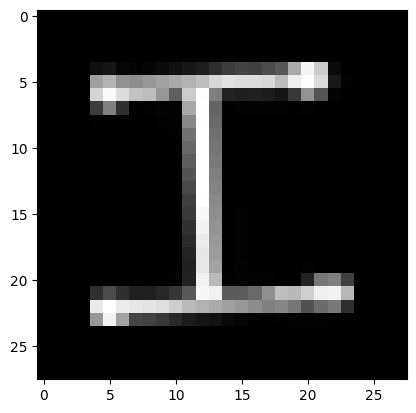

In [43]:
plt.imshow(letter_images[0], cmap = 'gray')

In [44]:
line = []

for i in range(len(letter_images)):
    letter = letter_images[i]
    
    if np.all(letter == 0):
        predicted_classes_original = ' '
    else:
        letter_reshaped = letter.reshape(-1, 28, 28, 1)
        predictions = model.predict(letter_reshaped)
        predicted_classes = np.argmax(predictions, axis=-1)
        predicted_classes_original = label_encoder.inverse_transform(predicted_classes)[0]
    
    line.append(predicted_classes_original)

1/1 [==============================] - 0s 6ms/step


In [45]:
line_string = ''.join(line)

In [46]:
line_string

'I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFEER ANY SOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATIVE '

# Fitting both models 

In [47]:
image_paths = []
lines = []

for i in range(1,7):
    image_path = f'target_images/line_{i}.png'
    image_paths.append(image_path)
    letter_images = extract_individual_images(image_path)
    line = []

    for i in range(len(letter_images)):
        letter = letter_images[i]

        if np.all(letter == 0):
            predicted_classes_original = ' '
        else:
            letter_reshaped = letter.reshape(-1, 28, 28, 1)
            predictions = model.predict(letter_reshaped)
            predicted_classes = np.argmax(predictions, axis=-1)
            predicted_classes_original = label_encoder.inverse_transform(predicted_classes)[0]

        line.append(predicted_classes_original)
        line_string = ''.join(line)
    lines.append(line_string)

1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


In [48]:
lines

['I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFEER ANY SOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATIVE ',
 'IT IS FRUSTRATING THRT YOU NEVER PAY ATTENTION DURING DISCUSSIONS AND YOUR LACK OF FOCUS IS REALLY AFFECTING OUR PROGRESS         ',
 'I AM DELIGHTED BY YOUR FRIENDLINESS AND YOU ALWRYS MAKE EVERYONE FEEL WELCOME WHICH FOSTERS A SENSE OF COMMUNITY        ',
 'IT GS WONDERFUL THAT YOU ALWAYS SHOW KINDNESS ANO YOUR EMPATHN TOWARDS OTHERS IS TRULY HEARTWARMING AND APPRECIATEO     ',
 'YOUR ANALYSIS OF THE DATA WAS ACCURATE AND WELL PRESENTED PROVIDING A CLEAR UNDERSTANBING OF THE TRENDS AND PATTERNS    ',
 'THE MEETING MINUTES YOU PREPARED WERE DETAILED AND WELL ORGANIZED ACCURATELY REFLECTING THE DISCUSSIONS AND DECISIONS MADE        ']

In [49]:
lines_transformed = vectorizer.transform(lines)
predictions = classifier.predict(lines_transformed)

In [50]:
for line, prediction in zip(lines, predictions):
    print(f"Text: {line} - Predicted sentiment: {prediction}")

Text: I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFEER ANY SOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATIVE  - Predicted sentiment: Angry
Text: IT IS FRUSTRATING THRT YOU NEVER PAY ATTENTION DURING DISCUSSIONS AND YOUR LACK OF FOCUS IS REALLY AFFECTING OUR PROGRESS          - Predicted sentiment: Angry
Text: I AM DELIGHTED BY YOUR FRIENDLINESS AND YOU ALWRYS MAKE EVERYONE FEEL WELCOME WHICH FOSTERS A SENSE OF COMMUNITY         - Predicted sentiment: Happy
Text: IT GS WONDERFUL THAT YOU ALWAYS SHOW KINDNESS ANO YOUR EMPATHN TOWARDS OTHERS IS TRULY HEARTWARMING AND APPRECIATEO      - Predicted sentiment: Happy
Text: YOUR ANALYSIS OF THE DATA WAS ACCURATE AND WELL PRESENTED PROVIDING A CLEAR UNDERSTANBING OF THE TRENDS AND PATTERNS     - Predicted sentiment: Neutral
Text: THE MEETING MINUTES YOU PREPARED WERE DETAILED AND WELL ORGANIZED ACCURATELY REFLECTING THE DISCUSSIONS AND DECISIONS MADE         - Predicted sentiment: Neutral


In [51]:
predictions

array(['Angry', 'Angry', 'Happy', 'Happy', 'Neutral', 'Neutral'],
      dtype='<U7')

In [52]:
target_labels = pd.read_csv('target_labels.csv')

In [53]:
target_labels

,file,sentiment
0,line_1.png,Angry
1,line_2.png,Angry
2,line_3.png,Happy
3,line_4.png,Happy
4,line_5.png,Neutral
5,line_6.png,Neutral


In [54]:
accuracy_score(predictions, target_labels['sentiment'])

1.0